In [42]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/business_data.csv")

# Preview data
df.head()


,Date,Revenue,Orders,Expenses
0,2021-01-01,20795,290,5071
1,2021-01-02,5860,271,27970
2,2021-01-03,43158,263,17454
3,2021-01-04,49732,184,10840
4,2021-01-05,16284,435,32654


In [1]:
import pandas as pd

df = pd.read_csv('../data/business_data.csv')
df.head()


,Date,Revenue,Orders,Expenses
0,2021-01-01,20795,290,5071
1,2021-01-02,5860,271,27970
2,2021-01-03,43158,263,17454
3,2021-01-04,49732,184,10840
4,2021-01-05,16284,435,32654


In [2]:
df.shape


(15000, 4)

In [3]:
df.columns


Index(['Date', 'Revenue', 'Orders', 'Expenses'], dtype='object')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      15000 non-null  object
 1   Revenue   15000 non-null  int64 
 2   Orders    15000 non-null  int64 
 3   Expenses  15000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 468.9+ KB


In [5]:
df.describe()


,Revenue,Orders,Expenses
count,15000.000000,15000.000000,15000.000000
mean,27301.478333,324.949867,21486.575467
std,12931.280856,159.336872,10635.236165
min,5002.000000,50.000000,3000.000000
25%,16085.000000,185.000000,12255.250000
50%,27191.500000,324.000000,21478.000000
75%,38507.000000,463.000000,30742.000000
max,49999.000000,599.000000,39999.000000


## Dataset Overview

This dataset contains daily business performance data including revenue,
number of orders, and expenses. It will be used to analyze trends, growth,
and anomalies before generating AI-based insights.


In [7]:
df['Date'] = pd.to_datetime(df['Date'])


In [8]:
df['Profit'] = df['Revenue'] - df['Expenses']
df.head()


,Date,Revenue,Orders,Expenses,Profit
0,2021-01-01,20795,290,5071,15724
1,2021-01-02,5860,271,27970,-22110
2,2021-01-03,43158,263,17454,25704
3,2021-01-04,49732,184,10840,38892
4,2021-01-05,16284,435,32654,-16370


In [9]:
df[['Revenue', 'Expenses', 'Profit']].describe()


,Revenue,Expenses,Profit
count,15000.000000,15000.000000,15000.000000
mean,27301.478333,21486.575467,5814.902867
std,12931.280856,10635.236165,16827.994105
min,5002.000000,3000.000000,-34666.000000
25%,16085.000000,12255.250000,-6373.000000
50%,27191.500000,21478.000000,5867.500000
75%,38507.000000,30742.000000,17991.000000
max,49999.000000,39999.000000,46703.000000


In [10]:
monthly = (
    df
    .set_index('Date')
    .resample('ME')
    .agg({
        'Revenue': 'sum',
        'Orders': 'sum',
        'Expenses': 'sum',
        'Profit': 'sum'
    })
    .reset_index()
)

monthly.head()


,Date,Revenue,Orders,Expenses,Profit
0,2021-01-31,798747,10262,577209,221538
1,2021-02-28,706034,9169,626554,79480
2,2021-03-31,794067,10222,689796,104271
3,2021-04-30,806576,10011,623705,182871
4,2021-05-31,853649,12033,680029,173620


## Business Metrics

Profit was calculated as the difference between revenue and expenses.
Monthly aggregation was performed to analyze long-term trends in revenue,
orders, and profitability.


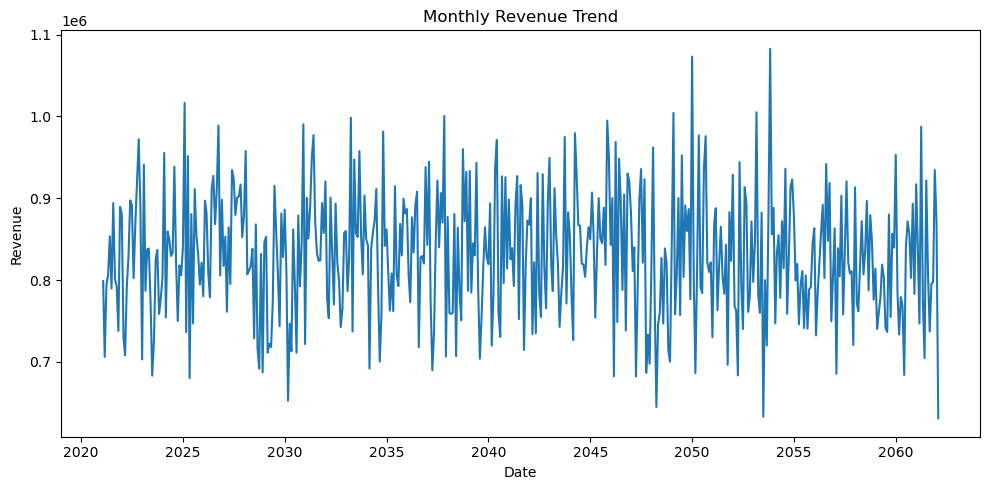

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly['Date'], monthly['Revenue'])
plt.title('Monthly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


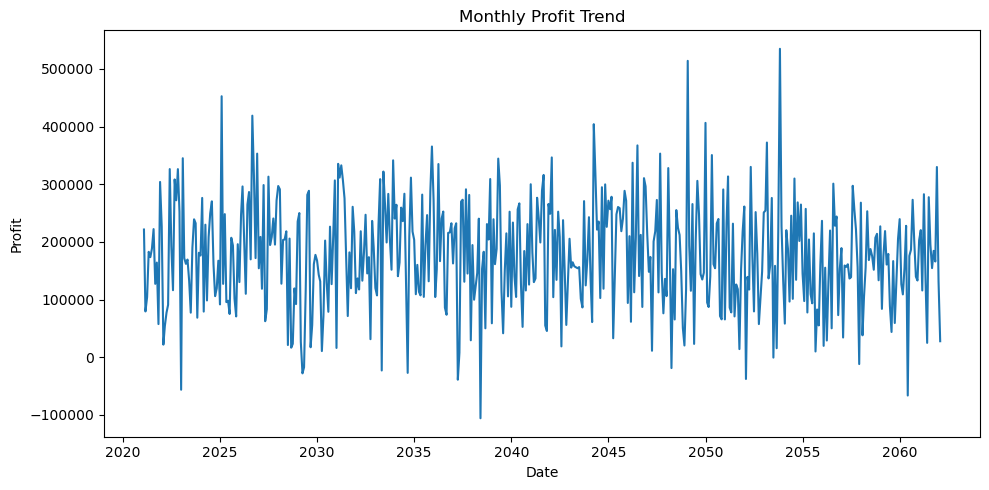

In [13]:
plt.figure(figsize=(10,5))
plt.plot(monthly['Date'], monthly['Profit'])
plt.title('Monthly Profit Trend')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()


## Trend Analysis

Revenue and profit trends were analyzed on a monthly basis to identify
growth patterns, seasonality, and potential anomalies.


In [15]:
monthly['Profit_Change_%'] = monthly['Profit'].pct_change() * 100
monthly.head()


,Date,Revenue,Orders,Expenses,Profit,Profit_Change_%
0,2021-01-31,798747,10262,577209,221538,NaN
1,2021-02-28,706034,9169,626554,79480,-64.123536
2,2021-03-31,794067,10222,689796,104271,31.191495
3,2021-04-30,806576,10011,623705,182871,75.380499
4,2021-05-31,853649,12033,680029,173620,-5.058757


In [16]:
threshold = 30  # 30% change

monthly['Anomaly'] = monthly['Profit_Change_%'].abs() > threshold

monthly[['Date', 'Profit', 'Profit_Change_%', 'Anomaly']]


,Date,Profit,Profit_Change_%,Anomaly
0,2021-01-31,221538,NaN,False
1,2021-02-28,79480,-64.123536,True
2,2021-03-31,104271,31.191495,True
3,2021-04-30,182871,75.380499,True
4,2021-05-31,173620,-5.058757,False
...,...,...,...,...
488,2061-09-30,184563,19.362453,False
489,2061-10-31,166083,-10.012841,False
490,2061-11-30,329972,98.678974,True
491,2061-12-31,131920,-60.020850,True


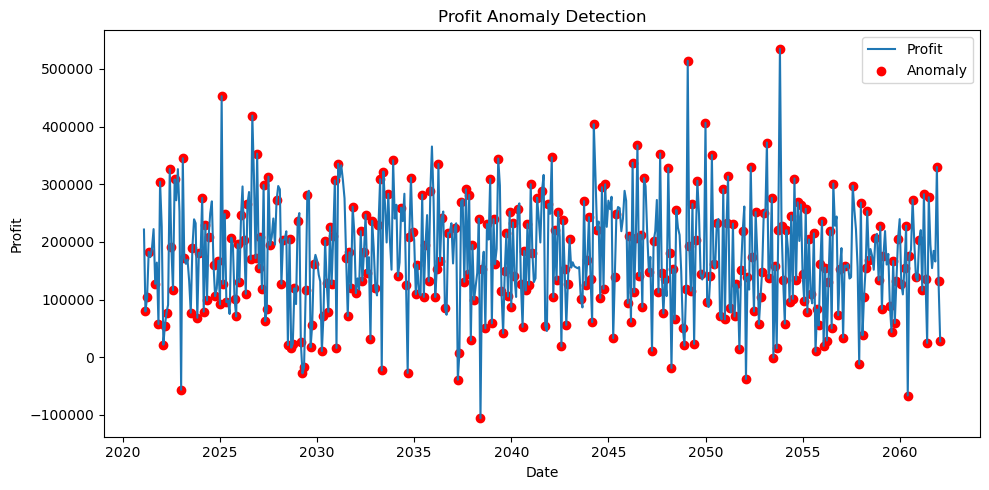

In [17]:
plt.figure(figsize=(10,5))
plt.plot(monthly['Date'], monthly['Profit'], label='Profit')

anomalies = monthly[monthly['Anomaly']]
plt.scatter(anomalies['Date'], anomalies['Profit'], color='red', label='Anomaly')

plt.title('Profit Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.tight_layout()
plt.show()


## Anomaly Detection

A rule-based anomaly detection approach was used to identify months
with unusual profit changes. Any month with more than ±30% change
compared to the previous month was flagged as an anomaly.

This helps businesses quickly identify abnormal performance periods.


In [19]:
def generate_insights(row):
    if row['Anomaly']:
        if row['Profit_Change_%'] > 0:
            return "Unusual profit spike detected. Possible successful campaign or seasonal demand."
        else:
            return "Significant profit drop detected. Possible increase in expenses or reduced demand."
    else:
        return "Normal business performance."

monthly['AI_Insight'] = monthly.apply(generate_insights, axis=1)

monthly[['Date', 'Profit', 'Profit_Change_%', 'AI_Insight']]


,Date,Profit,Profit_Change_%,AI_Insight
0,2021-01-31,221538,NaN,Normal business performance.
1,2021-02-28,79480,-64.123536,Significant profit drop detected. Possible inc...
2,2021-03-31,104271,31.191495,Unusual profit spike detected. Possible succes...
3,2021-04-30,182871,75.380499,Unusual profit spike detected. Possible succes...
4,2021-05-31,173620,-5.058757,Normal business performance.
...,...,...,...,...
488,2061-09-30,184563,19.362453,Normal business performance.
489,2061-10-31,166083,-10.012841,Normal business performance.
490,2061-11-30,329972,98.678974,Unusual profit spike detected. Possible succes...
491,2061-12-31,131920,-60.020850,Significant profit drop detected. Possible inc...


In [20]:
monthly[monthly['Anomaly']][['Date', 'Profit', 'AI_Insight']]


,Date,Profit,AI_Insight
1,2021-02-28,79480,Significant profit drop detected. Possible inc...
2,2021-03-31,104271,Unusual profit spike detected. Possible succes...
3,2021-04-30,182871,Unusual profit spike detected. Possible succes...
7,2021-08-31,127339,Significant profit drop detected. Possible inc...
9,2021-10-31,57561,Significant profit drop detected. Possible inc...
...,...,...,...
484,2061-05-31,24979,Significant profit drop detected. Possible inc...
485,2061-06-30,277618,Unusual profit spike detected. Possible succes...
490,2061-11-30,329972,Unusual profit spike detected. Possible succes...
491,2061-12-31,131920,Significant profit drop detected. Possible inc...


## AI Business Insight Generator

A rule-based AI system was built to automatically interpret business
performance. Instead of only visualizing data, the system generates
text-based insights explaining profit spikes and drops.

This approach mimics how AI-powered analytics tools provide decision
support to business stakeholders.


## Final Conclusion

This project demonstrates how business data can be transformed into
actionable insights using Python and AI-inspired logic.

By combining time-series analysis, anomaly detection, and automated
insight generation, the system simulates how modern AI analytics tools
support decision-making.

This project highlights strong skills in data analysis, business thinking,
and applied AI logic.


In [23]:
monthly.to_csv("../data/ai_business_insights.csv", index=False)
